In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from pandas import DataFrame
%matplotlib inline

In [2]:
df = pd.read_csv('Tweet.csv')

In [3]:
df.head()

source                                               text  \
0  Twitter for iPhone       #DDay75thAnniversary https://t.co/0fYfpvUghk   
1  Twitter for iPhone  Heading over to Normandy to celebrate some of ...   
2  Twitter for iPhone                     A big and beautiful day today!   
3  Twitter for iPhone  “The President has received glowing reviews fr...   
4  Twitter for iPhone  #DDay75thAnniversary #DDay75 https://t.co/BwfV...   

            created_at  retweet_count favorite_count is_retweet        id_str  
0  06-06-2019 11:50:25         4779.0          17600      false  1.136601e+18  
1  06-06-2019 07:38:28        11222.0          45694      false  1.136538e+18  
2  06-06-2019 05:57:16        13998.0          78732      false  1.136512e+18  
3  06-06-2019 05:55:49        10537.0          42291      false  1.136512e+18  
4  06-06-2019 05:40:23        11087.0          39223      false  1.136508e+18

In [4]:
df['is_retweet'].value_counts()

false                 34017
true                   1613
98482327390396416         1
115846232714391552        1
101013255950053376        1
Name: is_retweet, dtype: int64

In [5]:
df[df['is_retweet'].isin(['115846232714391552','101013255950053376', '98482327390396416'])]

source                 text  \
35173                 My in… (cont) http://t.co/YNX1msYh  09-19-2011 17:54:28   
35297  #Apprentice Andy and I talk about politics an…...  08-09-2011 19:33:31   
35322    My  interview yesterday on CNBC's Squawk Box...  08-02-2011 19:56:31   

      created_at  retweet_count favorite_count          is_retweet  id_str  
35173         18            7.0          false  115846232714391552     NaN  
35297         20            3.0          false  101013255950053376     NaN  
35322         13           12.0          false   98482327390396416     NaN

In [6]:
df = df.drop(df.index[[35173, 35297, 35322]])

In [7]:
df[df['is_retweet'].isin(['115846232714391552','101013255950053376', '98482327390396416'])]

Empty DataFrame
Columns: [source, text, created_at, retweet_count, favorite_count, is_retweet, id_str]
Index: []

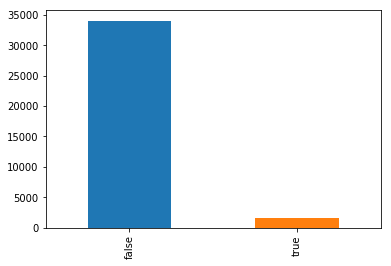

In [8]:
df['is_retweet'].value_counts().plot(kind='bar')

In [19]:
re.findall('(^|[^@\w])@(\w{1,15})', df['text'][12])

[('.', 'FLOTUS')]

In [11]:
df['text'][250]

'RT @ChuckGrassley: Another trade breakthru 2day w Japan lifting restrictions on US beef products. US beef into Japan has been 1 of the most…'

In [25]:
def getMention(text):
    
    mention = re.findall('(^|[^@\w])@(\w{1,15})', text)
    print(mention)
    if len(mention) > 0:
        return mention
    else:
        return ""

In [26]:
df['mention'] = df['text'].apply(getMention)

#DDay75thAnniversary https://t.co/0fYfpvUghk
[]
Heading over to Normandy to celebrate some of the bravest that ever lived. We are eternally grateful! #DDay75thAnniversary #DDay75 https://t.co/rg15c32Gow
[]
A big and beautiful day today!
[]
“The President has received glowing reviews from the British Media. Here at home not so much. MSNBC Ramps up hateful coverage and promotes conspiracy theories during Trump’s trip to Europe.”  @seanhannity  The good news is that @maddow is dying in the ratings along with @CNN!
[(' ', 'seanhannity'), (' ', 'maddow'), (' ', 'CNN')]
#DDay75thAnniversary #DDay75 https://t.co/BwfVEt7gTG
[]
Immigration discussions at the White House with representatives of Mexico have ended for the day. Progress is being made but not nearly enough! Border arrests for May are at 133000 because of Mexico &amp; the Democrats in Congress refusing to budge on immigration reform. Further...
[]
....talks with Mexico will resume tomorrow with the understanding that if no agreement 

RT @OmastaSkip: @dbongino As a retired FF I know that the majority of the rank and file are conservative or moderate and DO NOT support lib…
[(' ', 'OmastaSkip'), (' ', 'dbongino')]
RT @mr36561: @dbongino Stick in the eye by union...Trump has worked very hard for our first responders and union members...fighting very ha…
[(' ', 'mr36561'), (' ', 'dbongino')]
RT @kshaferus: @dbongino This statement is like so many others—liberal lies. Why would the military or emergency workers support a candidat…
[(' ', 'kshaferus'), (' ', 'dbongino')]
RT @harrypeterson_: @dbongino It doesn’t matter who they endorse the only person winning in 2020 is President Trump!
[(' ', 'harrypeterson_'), (' ', 'dbongino')]
RT @gIamourizes: @dbongino My husband a New York City firefighter for 15 years will be voting Trump 2020 all the way!!
[(' ', 'gIamourizes'), (' ', 'dbongino')]
RT @RealDanKida: @dbongino The Unions have become Corporations representing themselves Our President represents the people. #MAGA @real

[]
Congratulations to Brian Hagedorn on his big surprise win over a well funded Liberal Democrat in the Great State of Wisconsin for a very important Supreme Court seat. Republicans are producing big for Wisconsin!
[]
JOBS! JOBS! JOBS! https://t.co/3tukVpJpzN
[]
Heading to the Southern Border to show a section of the new Wall being built! Leaving now!
[]
....This will supersede USMCA. Likewise I am looking at an economic penalty for the 500 Billion Dollars in illegal DRUGS that are shipped and smuggled through Mexico and across our Southern Border. Over 10000 Americans die each year sooo many families destroyed!
[]
....However if for any reason Mexico stops apprehending and bringing the illegals back to where they came from the U.S. will be forced to Tariff at 25% all cars made in Mexico and shipped over the Border to us. If that doesn’t work which it will I will close the Border.......
[]
The Crazed and Dishonest Washington Post again purposely got it wrong. Mexico for the first time 

[(' ', 'IngrahamAngle')]
A low level staffer that I hardly knew named Cliff Sims wrote yet another boring book based on made up stories and fiction. He pretended to be an insider when in fact he was nothing more than a gofer. He signed a non-disclosure agreement. He is a mess!
[]
How does Da Nang Dick (Blumenthal) serve on the Senate Judiciary Committee when he defrauded the American people about his so called War Hero status in Vietnam only to later admit with tears pouring down his face that he was never in Vietnam. An embarrassment to our Country!
[]
In the beautiful Midwest windchill temperatures are reaching minus 60 degrees the coldest ever recorded. In coming days expected to get even colder. People can’t last outside even for minutes. What the hell is going on with Global Waming? Please come back fast we need you!
[]
“In the Media’s effort to destroy the President they are actually destroying themselves. Given all of the tremendous headwinds this President has faced it’s amazin

[]
House Republican Vote 217-185.
[]
The Democrats whose votes we need in the Senate will probably vote against Border Security and the Wall even though they know it is DESPERATELY NEEDED. If the Dems vote no there will be a shutdown that will last for a very long time. People don’t want Open Borders and Crime!
[]
No matter what happens today in the Senate Republican House Members should be very proud of themselves. They flew back to Washington from all parts of the World in order to vote for Border Security and the Wall. Not one Democrat voted yes and we won big. I am very proud of you!
[]
.....on a Border is only effective in conjunction with a Wall. Properly designed and built Walls work and the Democrats are lying when they say they don’t. In Israel the Wall is 99.9% successful. Will not be any different on our Southern Border! Hundreds of $Billions saved!
[]
The Democrats are trying to belittle the concept of a Wall calling it old fashioned. The fact is there is nothing else’s tha

[]
John James running as a Republican for the Senate from Michigan is a spectacular young star of the future. We should make him a star of the present. A distinguished West Point Grad and Vet people should Vote Out Schumer Puppet Debbie Stabenow who does nothing for Michigan!
[]
In just 2 days the people of Tennessee are going to elect @VoteMarsha Blackburn to the United States Senate to protect your jobs defend your borders and CONTINUE MAKING AMERICA GREAT AGAIN! Get out on Tuesday and VOTE for Marsha! https://t.co/BJhmItntMo
[(' ', 'VoteMarsha')]
Thank you for joining us tonight in Tennessee @TheLeeGreenwood. GOD BLESS THE U.S.A.! https://t.co/hfxi4Ct6Pv
[(' ', 'TheLeeGreenwood')]
Great to be back in Tennessee. On our way to the McKenzie Arena in Chattanooga for a huge #MAGARally - see everyone soon! https://t.co/RwZt5yGuE5
[]
Thank you Macon Georgia! Get out on Tuesday November 6th and VOTE for @BrianKempGA as your next Governor to protect your jobs defend your borders fight for yo

[(' ', 'NHC_Atlantic')]
RT @NHC_Atlantic: A Storm Surge Warning remains in effect for much of the Florida Panhandle and Big Bend region where life-threatening sto…
[(' ', 'NHC_Atlantic')]
RT @NHC_Atlantic: NHC Director Ken Graham will provide a Facebook Live broadcast regarding Category 4 Hurricane #Michael at 8:45 a.m. EDT (…
[(' ', 'NHC_Atlantic')]
RT @fema: As Hurricane #Michael nears land take shelter &amp; stay safe.📱Follow weather updates on your phone or radio.🔹 In a tornado WARN…
[(' ', 'fema')]
Walker Stapleton is running as the highly respected Republican Candidate for Governor of the Great State of Colorado. His credentials and talents are impeccable. He has my complete and total Endorsement!
[]
RT @FLGovScott: If you’re in an evacuation zone I am urging you to leave RIGHT NOW. Do not risk your life or the lives of your loved ones-…
[(' ', 'FLGovScott')]
THANK YOU IOWA &amp; NEBRASKA! VOTE VOTE VOTE! https://t.co/0pWiwCHGbh https://t.co/tzkiQ4IlEd
[]
https://t.co/CPf3oxgdRX


The United States has ended the ridiculous 230 Million Dollar yearly development payment to Syria. Saudi Arabia and other rich countries in the Middle East will start making payments instead of the U.S. I want to develop the U.S. our military and countries that help us!
[]
https://t.co/TfRmZA8RWQ
[]
The Economy is stronger and better than ever before. Importantly there remains tremendous potential - it will only get better with time!
[]
Great Job  Rachel Campos-Duffy on @foxandfriends.
[(' ', 'foxandfriends')]
Has anyone looked at the mistakes that John Brennan made while serving as CIA Director? He will go down as easily the WORST in history &amp; since getting out he has become nothing less than a loudmouth partisan political hack who cannot be trusted with the secrets to our country!
[]
https://t.co/5kIR5EggBp
[]
All of the fools that are so focused on looking only at Russia should start also looking in another direction China. But in the end if we are smart tough and well prepared 

[]
Some people HATE the fact that I got along well with President Putin of Russia. They would rather go to war than see this. It’s called Trump Derangement Syndrome!
[]
“A lot of Democrats wished they voted for the Tax Cuts because the economy is booming - we could have 4% growth now and the Fed said yesterday that unemployment could drop again.”  @foxandfriends  @kilmeade
[(' ', 'foxandfriends'), (' ', 'kilmeade')]
Congratulations to Martha Roby of The Great State of Alabama on her big GOP Primary win for Congress. My endorsement came appropriately late but when it came the “flood gates” opened and you had the kind of landslide victory that you deserve. Enjoy!
[]
....Russia has agreed to help with North Korea where relationships with us are very good and the process is moving along. There is no rush the sanctions remain! Big benefits and exciting future for North Korea at end of process!
[]
While the NATO meeting in Brussels was an acknowledged triumph with billions of dollars more be

WITCH HUNT!
[]
There will be big news coming soon for our great American Autoworkers. After many decades of losing your jobs to other countries you have waited long enough!
[]
Big legislation will be signed by me shortly. After many years RIGHT TO TRY and big changes to DODD FRANK.
[]
Our Trade Deal with China is moving along nicely but in the end we will probably have to use a different structure in that this will be too hard to get done and to verify results after completion.
[]
“Trump should be happy that the FBI was SPYING on his campaign” No James Clapper I am not happy. Spying on a campaign would be illegal and a scandal to boot!
[]
Everybody is with Tomi Lahren a truly outstanding and respected young woman! @foxandfriends
[(' ', 'foxandfriends')]
SPYGATE could be one of the biggest political scandals in history!
[]
“It’s clear that they had eyes and ears all over the Trump Campaign” Judge Andrew Napolitano
[]
Look how things have turned around on the Criminal Deep State. They go

Today the House took major steps toward securing our schools by passing the STOP School Violence Act. We must put the safety of America's children FIRST by improving training and by giving schools and law enforcement better tools. A tragedy like Parkland can't happen ever again!
[]
Thank you for hosting! #MAGA https://t.co/9pHH60DVlX
[]
We cannot keep a blind eye to the rampant unfair trade practices against our Country!
[]
Five of our incredible @Cabinet Secretaries are testifying on the Hill this morning on the need to rebuild our Nation’s crumbling infrastructure. We need to build FAST &amp; we need to build for our FUTURE. Thank you @SenateCommerce for hosting this hearing! #InfrastructureInAmerica
[(' ', 'Cabinet'), (' ', 'SenateCommerce')]
Perhaps at no time in history have the business fundamentals of U.S. companies been better than they are today!
[]
Hundreds of good people including very important Ambassadors and Judges are being blocked and/or slow walked by the Democrats in 

Such respect for the people of Iran as they try to take back their corrupt government. You will see great support from the United States at the appropriate time!
[]
“President Trump has something now he didn’t have a year ago that is a set of accomplishments that nobody can deny. The accomplishments are there look at his record he has had a very significant first year.” @LouDobbs ShowDavid Asman &amp; Ed Rollins
[(' ', 'LouDobbs')]
I will be announcing THE MOST DISHONEST &amp; CORRUPT MEDIA AWARDS OF THE YEAR on Monday at 5:00 o’clock. Subjects will cover Dishonesty &amp; Bad Reporting in various categories from the Fake News Media. Stay tuned!
[]
North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone from his depleted and food starved regime please inform him that I too have a Nuclear Button but it is a much bigger &amp; more powerful one than his and my Button works!
[]
...peace treaty with Israel. We have taken Jerusalem the t

...are now fighting back like never before. There is so much GUILT by Democrats/Clinton and now the facts are pouring out. DO SOMETHING!
[]
..."collusion" which doesn't exist. The Dems are using this terrible (and bad for our country) Witch Hunt for evil politics but the R's...
[]
...the Uranium to Russia deal the  33000 plus deleted Emails the Comey fix and so much more. Instead they look at phony Trump/Russia....
[]
Never seen such Republican ANGER &amp; UNITY as I have concerning the lack of investigation on Clinton made Fake Dossier (now $12000000?)....
[]
As usual the ObamaCare premiums will be up (the Dems own it) but we will Repeal &amp; Replace and have great Healthcare soon after Tax Cuts!
[]
JFK Files are released long ahead of schedule!
[]
While not at all presidential I must point out that the Sloppy Michael Moore Show on Broadway was a TOTAL BOMB and was forced to close. Sad!
[]
Happy #FirstRespondersDay to all of our HEROES out there. We are forever grateful to you for yo

Republicans sorry but I've been hearing about Repeal &amp; Replace for 7 years didn't happen! Even worse the Senate Filibuster Rule will....
[]
Our incredible U.S. Coast Guard saved more than 15000 lives last week with Harvey. Irma could be even tougher. We love our Coast Guard!
[]
Hurricane Irma is of epic proportion perhaps bigger than we have ever seen. Be safe and get out of its wayif possible. Federal G is ready!
[]
We will confront ANY challenge no matter how strong the winds or high the water. I’m proud to stand with Presidents for #OneAmericaAppeal.
[]
I encourage EVERYONE in the path of #HurricaneIrma to heed the advice and orders of local &amp; state officials! https://t.co/AQmawTpZs0
[]
During my trip to Saudi Arabia I spoke to the leaders of more than 50 Arab &amp; Muslim nations about the need to confront our shared enemies.. https://t.co/8oeAQfIeX8
[]
Together we will show the world that the forces of destruction and extremism are NO MATCH for the BLESSINGS of PROSPERITY 

I heard poorly rated @Morning_Joe speaks badly of me (don't watch anymore). Then how come low I.Q. Crazy Mika along with Psycho Joe came..
[(' ', 'Morning_Joe')]
New Sugar deal negotiated with Mexico is a very good one for both Mexico and the U.S. Had no deal for many years which hurt U.S. badly.
[]
Tomorrow the House votes on #KatesLaw &amp; No Sanctuary For Criminals Act. Lawmakers must vote to put American safety… https://t.co/p3vd8IXXaD
[]
From my first day in office we’ve taken swift action to lift the crushing restrictions on American energy. Remarks… https://t.co/VBoEubD59k
[]
Democrats purposely misstated Medicaid under new Senate bill - actually goes up. https://t.co/necCt4K6UH
[]
Today I hosted an immigration roundtable ahead of two votes taking place in Congress tomorrow. Watch and read more… https://t.co/5k8WzW1t68
[]
It was my great honor to welcome the 2016 World Series Champion Chicago @Cubs ⚾️ to the @WhiteHouse this afternoon.… https://t.co/GvPhJ9hZdv
[(' ', 'Cubs'), (

Judge Gorsuch will be sworn in at the Rose Garden of the White House on Monday at 11:00 A.M. He will be a great Justice. Very proud of him!
[]
The reason you don't generally hit runways is that they are easy and inexpensive to quickly fix (fill in and top)!
[]
Congratulations to our great military men and women for representing the United States and the world so well in the Syria attack.
[]
...goodwill and friendship was formed but only time will tell on trade.
[]
It was a great honor to have President Xi Jinping and Madame Peng Liyuan of China as our guests in the United States. Tremendous...
[]
RT @IvankaTrump: Very proud of Arabella and Joseph for their performance in honor of President Xi Jinping and Madame Peng Liyuan's official…
[(' ', 'IvankaTrump')]
It was an honor to host our American heroes from the @WWP #SoldierRideDC at the @WhiteHouse today with @FLOTUS @VP… https://t.co/u5AI1pupVV
[(' ', 'WWP'), (' ', 'WhiteHouse'), (' ', 'FLOTUS'), (' ', 'VP')]
JOBS JOBS JOBS!https://t.c

[]
Statement on International Holocaust Remembrance Day: https://t.co/KjU0MOxCHk
[]
.@VP Mike Pence will be speaking at today's #MarchForLife -- You have our full support! https://t.co/1jb53SEGV4
[('.', 'VP')]
The #MarchForLife is so important. To all of you marching --- you have my full support!
[]
Mexico has taken advantage of the U.S. for long enough. Massive trade deficits &amp; little help on the very weak border must change NOW!
[]
Look forward to seeing final results of VoteStand. Gregg Phillips and crew say at least 3000000 votes were illegal. We must do better!
[]
Miami-Dade Mayor drops sanctuary policy. Right decision. Strong! https://t.co/MtPvaDC4jM
[]
Will be interviewed by @SeanHannity on @FoxNews at 10:00pm tonight. Enjoy!
[(' ', 'SeanHannity'), (' ', 'FoxNews')]
Spoke at the Congressional @GOP Retreat in Philadelphia PA. this afternoon w/ @VP @SenateMajLdr @SpeakerRyan. Th… https://t.co/ALSADGrwoe
[(' ', 'GOP'), (' ', 'VP'), (' ', 'SenateMajLdr'), (' ', 'SpeakerRyan')]
S

#CrookedHillary sending U.S. intelligence info. to Podesta’s hacked email is ‘unquestionably an OPSEC violation’ https://t.co/z58aeo4CO7
[]
WikiLeaks reveals Clinton camp’s work with ‘VERY friendly and malleable reporters’ #DrainTheSwamp #CrookedHillaryhttps://t.co/bcYLslrxi0
[]
Donna Brazile Shreds Obama Economy - Acting DNC chair says 'people are more in despair about how things are' https://t.co/LQNbISSoX0
[]
{Crooked Hillary Clinton} created this mess and she knows it. #DrainTheSwamp https://t.co/3cBNYjl5CD https://t.co/sjwkuq3nkk
[]
'Clinton Campaign And Harry Reid Worked With New York Times To Smear State Dept Watchdog'Time to #DrainTheSwamp! https://t.co/0VDdGdpCTg
[]
VERY IRONIC: "In 2010 video Clinton lectured underlings on cybersecurity and guarding ‘sensitive information’" https://t.co/dL7VDMqSLy
[]
Great crowd in Johnstown Pennsylvania- thank you. Get out &amp; VOTE on 11/8! Watch the MOVEMENT in PA. this afternoon… https://t.co/DUMlbSkVeY
[]
A top Clinton Foundation offici

RT @GMA: WATCH: @IvankaTrump on "women who work;" empowering campaign celebrates modern women.  https://t.co/rMFe9o6WcL
[(' ', 'GMA'), (' ', 'IvankaTrump')]
Hopefully the violence &amp; unrest in Charlotte will come to an immediate end. To those injured get well soon. We need unity &amp; leadership.
[]
The situations in Tulsa and Charlotte are tragic. We must come together to make America safe again.
[]
It is a MOVEMENT - not a campaign. Leaving the past behind changing our future. Together we will MAKE AMERICA SAF… https://t.co/Lt2L3NKzyi
[]
Thank you Kenansville North Carolina! Remember- on November 8th that special interest gravy train is coming to a… https://t.co/AysJRMzvKw
[]
Thank you High Point NC! I will fight for every neglected part of this nation &amp; I will fight to bring us together… https://t.co/DSaUpSptBz
[]
Hillary Clinton is taking the day off again she needs the rest. Sleep well Hillary - see you at the debate!
[]
Heading to North Carolina for two big rallies. Will b

[]
#CrookedHillary is outspending me by a combined 31 to 1 in Florida Ohio &amp; Pennsylvania. I haven't started yet! https://t.co/BcoPrwqFMe
[]
Thank you Florida Ohio and Pennsylvania! #CrookedHillary is not qualified. #ImWithYou https://t.co/M1yzgyeEdY
[]
Thank you! #ImWithYou https://t.co/6XkUQ0W4QS
[]
Justice Ginsburg of the U.S. Supreme Court has embarrassed all by making very dumb political statements about me. Her mind is shot - resign!
[]
THANK YOU INDIANA! #Trump2016 https://t.co/Jmkah9wGaA
[]
Thank you Iowa- see you soon!#Trump2016 #ImWithYou https://t.co/gva0MbgnuO https://t.co/PE1jdqZysc
[]
I will be interviewed by @oreillyfactor tonight on @FoxNews at 8pm. Enjoy!
[(' ', 'oreillyfactor'), (' ', 'FoxNews')]
The American people agree. No free pass for #CrookedHillary! https://t.co/lTjLVKkzh1
[]
To all the Bernie voters who want to stop bad trade deals &amp; global special interests we welcome you with open arms. People first.
[]
Bernie sanders has abandoned his supporters by 

A massive blow to Obama's message - only 38000 new jobs for month in just issued jobs report. That's REALLY bad!
[]
Crooked Hillary is being badly criticized (for a Wall Street paid for ad) by PolitiFact for a false ad on me on women. She is a total fraud!
[]
Crooked Hillary Clinton has not held a news conference in more than 7 months. Her record is so bad she is unable to answer tough questions!
[]
Just like I have been able to spend far less money than  others on the campaign and finish #1 so too should our country. We can be great!
[]
People like @KatyTurNBC report on my campaign but have zero access. They say what they want without any knowledge.True of so much of media!
[(' ', 'KatyTurNBC')]
Hillary Clinton is unfit to be president. She has bad judgement poor leadership skills and a very bad and destructive track record. Change!
[]
I am watching @CNN very little lately because they are so biased against me. Shows are predictable garbage! CNN and MSM is one big lie!
[(' ', 'CNN')]


[]
#ICYMI: @foxandfriends this morning. https://t.co/s5pUEdCWI0
[(' ', 'foxandfriends')]
I will be interviewed on @foxandfriends at 9:00 A.M. I will be talking about the rigged and boss controlled Republican primaries!
[(' ', 'foxandfriends')]
@dmharvey89: @realDonaldTrump @wdct8110 I just voted for @realDonaldTrump in Indiana. Everyone I talk to was following suit! Fantastic!
[('', 'dmharvey89'), (' ', 'realDonaldTrump'), (' ', 'wdct8110'), (' ', 'realDonaldTrump')]
@herb_stamper: @JackoffJosh711 @SenFrankNiceley @FoxNews @WSJ we are becoming a third world country because of jerks like him Great!
[('', 'herb_stamper'), (' ', 'JackoffJosh711'), (' ', 'SenFrankNiceley'), (' ', 'FoxNews'), (' ', 'WSJ')]
@wdct8110: @realDonaldTrump We love you Donald ! Finally someone who actually cares about us .. !! https://t.co/BKoQu1mm4A
[('', 'wdct8110'), (' ', 'realDonaldTrump')]
@Bubble709_: @realDonaldTrump Praying for your family and your win in New York. Thank you!
[('', 'Bubble709_'), (' ', 're

@StevenMeyers11: @Vogelsong1 @EdRollins @FoxNews Ed Rollins is the only one of those people that understands process &amp; gets it right
[('', 'StevenMeyers11'), (' ', 'Vogelsong1'), (' ', 'EdRollins'), (' ', 'FoxNews')]
I am growing the Republican Party tremendously - just look at the numbers way up! Democrats numbers are significantly down from years past.
[]
@jojo2foxy: TRUMP IS UNSTOPPABLE....HE IS WHAT COMMON SENSE AMERICANS WANT WHETHER REPUBLICAN INDEPENDENT OR A REAGAN DEMOCRAT.,02-23-2016 15:38:24,2017,6336,false,702155553485619200
Twitter for Android,@Vogelsong1: @EdRollins gets it. Was just on @FoxNews explaining how Trump wins the general election."  Thank you Ed!
[('', 'jojo2foxy'), (',', 'Vogelsong1'), (' ', 'EdRollins'), (' ', 'FoxNews')]
Ted Cruz lifts the Bible high into the air and then lies like a dog-over and over again! The Evangelicals in S.C. figured him out &amp; said no!
[]
Ted Cruz does not have the right "temperment" to be President. Look at the way he totall

[]
IPSOS/REUTERS POLLThank you! #Trump2016 #MakeAmericaGreatAgain https://t.co/sbzp75EPSq
[]
It's time for Ted Cruz to either settle his problem with the FACT that he was born in Canada and was a citizen of Canada or get out of race
[]
@Rketeltas: Rubio isn't experienced enough to be Commander in Chief. Rubio is a carbon copy of Obama. We need a true leader Vote Trump
[('', 'Rketeltas')]
@red77angelluis: @realDonaldTrump @NeilTurner_ @YouTube LET'S GET TRUMP!! GO TRUMP!! USA!USA!
[('', 'red77angelluis'), (' ', 'realDonaldTrump'), (' ', 'NeilTurner_'), (' ', 'YouTube')]
@MrJuuon: #WeAreBernie will be overtaken by #WeWantTrump. We are superior and have more supporters. #makeamericagreatagain #trump.
[('', 'MrJuuon')]
@Knight276:  @C4Constitution trump right again #With_Cruz_you_lose! Nobody supports Canuck Cruz #MakeAmericaGreatAgain  #trump2016,01-25-2016 04:04:21,697,2543,false,691471643982614528
Twitter for Android,@Tuggers56: @PMgeezer Hillary is so afraid of him. The GOP is afraid o

Thank you Hilton Head South Carolina! @SCTeamTrump #Trump2016 https://t.co/RLCz17tIas https://t.co/L5IAlbsdkw
[(' ', 'SCTeamTrump')]
I never thought I'd be saying this but I've really enjoyed  @RichLowry on television lately and he was terrific hosting @seanhannity
[(' ', 'RichLowry'), (' ', 'seanhannity')]
Joe McQuaid (@deucecrew) is desperately trying to sell the @UnionLeader. It's a loser and my comments haven't helped him much.
[('(', 'deucecrew'), (' ', 'UnionLeader')]
The dying @UnionLeader newspaper in NH is in turmoil over my comments about them- like a bully that got knocked out!
[(' ', 'UnionLeader')]
@TruthisAll1: @realDonaldTrump @CharlesHurt @seanhannity Good morning Mr. Trump. You're so AWESOME. #Trump2016 https://t.co/LljQbi4fdP
[('', 'TruthisAll1'), (' ', 'realDonaldTrump'), (' ', 'CharlesHurt'), (' ', 'seanhannity')]
@bfb123456: @trumpiowa @PlaysTrumpCard @realDonaldTrump  WOW! FANTASTIC!. WHO KNEW AMERICANS WERE SO SMART? GREAT TO KNOW WE'RE so smart
[('', 'bfb123456'

[(' ', 'nytimes')]
So since the people at the @nytimes have made all bad decisions over the last decade why do people care what they write. Incompetent!
[(' ', 'nytimes')]
The dopes at the @nytimes bought the Boston Globe for $1.3 billion and sold it for $1.00. Their great old headquarters-gave it away! So dumb
[(' ', 'nytimes')]
The @nytimes is so poorly run and managed that other family members are looking to take over control. With unfunded liabilities-big trouble!
[(' ', 'nytimes')]
@RioSunny3: @realDonaldTrump @WKRG I lived in New Jersey at that time and witnessed all that as well.,11-26-2015 01:24:35,872,2173,false,669688167138770944
Twitter for Android,The failing @nytimes should be focused on good reporting and the papers financial survival and not with constant hits on Donald Trump!,11-26-2015 01:21:54,1495,3600,false,669687491100844032
Twitter for Android,@Keeping__Real: So good to see the @realDonaldTrump family out with him on the campaign trail! It really shows the family 

[(' ', 'FoxNews')]
Just landed in New Hampshire - a very exciting morning planned!
[]
Isn't it terrible that @megynkelly used a poll not used before (I.B.D.) when I was down but refuses to use it now when I am up?
[(' ', 'megynkelly')]
#MakeAmericaGreatAgain #Trump2016 https://t.co/f9ujgy3NSk
[]
@JoshuaEnglishh: @realDonaldTrump  every single real American needs to read #CrippledAmerica ! Beyond awesome I couldn't be more thrilled
[('', 'JoshuaEnglishh'), (' ', 'realDonaldTrump')]
@peter_smells: @realDonaldTrump Just read #CrippledAmerica! Great book! I haven't felt this enthusiastic about #America since #Reagan
[('', 'peter_smells'), (' ', 'realDonaldTrump')]
@LeStudio1: DONALD TRUMP-CRIPPLED AMERICAThe new book by @realDonaldTrump is best seller in the making.
[('', 'LeStudio1'), (' ', 'realDonaldTrump')]
@svn2hd: @realDonaldTrump Crippled AMERICA is a must read. So right. Great job on another best seller.
[('', 'svn2hd'), (' ', 'realDonaldTrump')]
@JudgeMoroz: Republicans in Congres

I will be going to Atlanta Georgia tomorrow—here’s the info: http://t.co/Ty3VYUMphm. Hope to see you there! #MakeAmericaGreatAgain!
[]
I will be interviewed on @FacetheNation Sunday 10AM on CBS. @johndickerson is a true pro!
[(' ', 'FacetheNation'), (' ', 'johndickerson')]
@BarbMuenchen  @grindingdude  the book to read is Time to get Tough making America great again. Thanks.
[('', 'BarbMuenchen'), (' ', 'grindingdude')]
Thanks Larry. Best wishes.  https://t.co/AZwPbSjj7T
[]
Good luck! Enjoy. https://t.co/ddfPtVYpXv
[]
@LauraRosenCohen @MarkSteynOnline  on @realDonaldTrump There is nothing Trump does that doesn't work for him."
[('', 'LauraRosenCohen'), (' ', 'MarkSteynOnline'), (' ', 'realDonaldTrump')]
@DavidFoody @realDonaldTrump Thank you for taking on the   Establishment.They don't know what to do do they?
[('', 'DavidFoody'), (' ', 'realDonaldTrump')]
@AlisaApps  @realDonaldTrump you were fantastic yesterday in Las Vegas - a great event. Passionate people. Keep it up! #AlisaReal T

@Hashtag1USA: @realDonaldTrump Trump rocked Iowa today heard his message was positive and built much enthusiasm among the voters #Trump2016,09-12-2015 23:24:32,1125,2451,false,642841250903621632
Twitter for Android,@Mey: I don't know how any American can watch this video and not want to vote for @realDonaldTrump #TeamTrump 🇺🇸 https://t.co/387cDb55nH"
[('', 'Hashtag1USA'), (' ', 'realDonaldTrump'), (',', 'Mey'), (' ', 'realDonaldTrump')]
@whyWinblo: @realDonaldTrump please make this country great again &amp; help secure our borders Mr. Trump you're our last hope. #Trump2016
[('', 'whyWinblo'), (' ', 'realDonaldTrump')]
@jeffraykovich: @realDonaldTrump Are you going to come to Wisconsin in the near future?#Trump2016 #MakeAmericaGreatAgain Yes.
[('', 'jeffraykovich'), (' ', 'realDonaldTrump')]
@DaveInKeno: Mr. Trump Sir this country is and has been on a path of self destruction and needs you to MAKE AMERICA GREAT AGAIN!
[('', 'DaveInKeno')]
@joeearle: @Pistol044 There's only one I'll neve

AmyMek  Amen! @realDonaldTrump has drawn more attention to Veterans issues in 1 week than these politicians have in decades!
[(' ', 'realDonaldTrump')]
Wow! Such a wonderful article from fantastic people--my great honor! https://t.co/LO14es9CLp
[]
Poll: Trump Leads GOP Field Among Hispanics Records 34% Favorability  http://t.co/AANybghvCv
[]
@JoeDurak If Jeb is the nominee Hillary is our next president.
[('', 'JoeDurak')]
@tweet2u2 #Trump only attacks those that attack him first. He's not going to be abused by a  #politician @marthamaccallum #tcot
[('', 'tweet2u2'), (' ', 'marthamaccallum')]
@iuhoops2015 @realDonaldTrump it should be an honor and a privilege to be in this country. Not a right. Make America great again! 
[('', 'iuhoops2015'), (' ', 'realDonaldTrump')]
@ToTheTanr @realDonaldTrump You are the closest thing to Teddy Roosevelt. Tough as hell and speaks his damn mind. And NEVER BS's
[('', 'ToTheTanr'), (' ', 'realDonaldTrump')]
Thank you. https://t.co/uA1LZ0EoAo
[]
@breadman

[]
Looking forward to speaking at the @ARGOP Reagan-Rockefeller Dinner tonight! Record crowd. We are no longer silent! #MAKEAMERICAGREATAGAIN!
[(' ', 'ARGOP')]
I had thousands join me in New Hampshire last night! @HillaryClinton had 68. The #SilentMajority is fed up with what is going on in America!
[(' ', 'HillaryClinton')]
@Tamaralynn212: @RWSurferGirl  @realDonaldTrump The whole Gov. needs to be remodeled he's the man for the job. I'd love to see him Prez.
[('', 'Tamaralynn212'), (' ', 'RWSurferGirl'), (' ', 'realDonaldTrump')]
@TheRealCamSand: It would be to cool if @realDonaldTrump was the president. Thanks!
[('', 'TheRealCamSand'), (' ', 'realDonaldTrump')]
@GotMade: @realDonaldTrump @JohnMcCain Trump speaks the truth about foolish leaders negotiating and you hate the truth McCain
[('', 'GotMade'), (' ', 'realDonaldTrump'), (' ', 'JohnMcCain')]
Get rid of gun free zones. The four great marines who were just shot never had a chance. They were highly trained but helpless without gu

@Jessyandcandy: Trump  you got my vote. With your proven resume os success. People would be nuts not to vote for you. Trump2016
[('', 'Jessyandcandy')]
@JakeAwK: Donald Trump is the ONLY candidate that is incorruptible and he will get rid off all of the incompetence ruining our country.,06-22-2015 01:18:46,153,406,false,612791807680860160
Twitter for Android,@sallyvp: @realDonaldTrump Mr. Trump tell America they are fired! Bring some respect and balls back to the USA."
[('', 'JakeAwK'), (',', 'sallyvp'), (' ', 'realDonaldTrump')]
@IsaacNewYorker: I said when Trump ran for president i was gonna be the happiest man on earthwhen he winsall Americans will be #Trump16
[('', 'IsaacNewYorker')]
@lauralynn1955: @realDonaldTrump - @oreillyfactor loves you. It was obvious to me when you were on the day you announced. Bill O is great.
[('', 'lauralynn1955'), (' ', 'realDonaldTrump'), (' ', 'oreillyfactor')]
@kirkcameronfan: @realDonaldTrump @FoxNews Because they're AFRAID of you! #Trump2016 #Amer

@2014_vince: @realDonaldTrump strong clear decisive leader needed..vote trump  Thank you!
[('', '2014_vince'), (' ', 'realDonaldTrump')]
@SeanlaiC: RT @JeanRalphiooo I would endorse @realDonaldTrump in a presidential run!
[('', 'SeanlaiC'), (' ', 'JeanRalphiooo'), (' ', 'realDonaldTrump')]
@thedanid: I see you boss @realDonaldTrump 🙌🏼 http://t.co/dVZjQTXNXd
[('', 'thedanid'), (' ', 'realDonaldTrump')]
@kamwaters: @realDonaldTrump Can't wait for your exciting June announcement! Keep posting videos they're always informative. #Trump2016
[('', 'kamwaters'), (' ', 'realDonaldTrump')]
@CarterDeKeyser: People get so mad when I tell them the only person I would even consider voting for in 2016 is @realDonaldTrump if he runs,05-23-2015 04:26:51,20,78,false,601967503242301440
Twitter for Android,@HoboWill: @realDonaldTrump you are convincing me more and more.."  That's good news!
[('', 'CarterDeKeyser'), (' ', 'realDonaldTrump'), (',', 'HoboWill'), (' ', 'realDonaldTrump')]
@goldregime: I'm sol

[('', 'zrill'), (' ', 'realDonaldTrump')]
@DeanPreston76: Time for you to tell @BarackObama 'You're fired!'. #TrumpForPresident2016 We need someone who loves America in office!
[('', 'DeanPreston76'), (' ', 'BarackObama')]
@MasterBaxter8: I want to see a man that's not a career politician in office. America FORGOT what a great leader can do! #fixtheUSA
[('', 'MasterBaxter8')]
@cjwthefishermen: @realDonaldTrump I will.""
[('', 'cjwthefishermen'), (' ', 'realDonaldTrump')]
@DavidNYCT: @realDonaldTrump We will!
[('', 'DavidNYCT'), (' ', 'realDonaldTrump')]
@tegodreaux: You didnt build an empire on Hope you built it on Hard work and dedication. Balancing budgets and making profits. RUN SIR !
[('', 'tegodreaux')]
@baberuth99: We've got your back Mr. Trump! we're not politicians (all talk and no action). just let us know what you need us to do.
[('', 'baberuth99')]
@johnborntoride: @realDonaldTrump got my vote! Need a real leader n a business man! No more corrupt politicians
[('', 'johnbornt

@wiccanfoxglove: @realDonaldTrump will you run? Can you get us out of the hole we are in? I want this nation to be strong &amp; proud!,04-11-2015 04:49:51,15,48,false,586752999608967168
Twitter for Android,@tuckahoetommy: If @realDonaldTrump truly believes he could fix America and loves our Country shouldn't he feel obligated to run?" Yes!
[('', 'wiccanfoxglove'), (' ', 'realDonaldTrump'), (',', 'tuckahoetommy'), (' ', 'realDonaldTrump')]
@WarrenMarcussen: @realDonaldTrump @KBrocking I love your show though Donny I'm a fuckung huge fan But our country is dieing!
[('', 'WarrenMarcussen'), (' ', 'realDonaldTrump'), (' ', 'KBrocking')]
@AutumnJuliaa: My goal in life is to master the idea of a balance sheet as flawlessly as @realDonaldTrump did at my age.
[('', 'AutumnJuliaa'), (' ', 'realDonaldTrump')]
@markraymond  Thanks Mark they will!
[('', 'markraymond')]
@anthonycl: .@realDonaldTrump Donald Trump for president! He's the only one who can run a successful business!
[('', 'anthonycl'),

[('', 'MansfieldRA'), (' ', 'realDonaldTrump'), (' ', 'realDonaldTrump')]
@Luigiboria: Extraordinario Concierto en #Doral con @SantanaCarlos Great concert at @TrumpDoral  #mayorluigiboria http://t.co/s9yh3mRmt3
[('', 'Luigiboria'), (' ', 'SantanaCarlos'), (' ', 'TrumpDoral')]
Today's final round of the WGC Cadillac Championship will be amazing. A lot of pressure on leader who has played great. Big names hunting!
[]
@toypilaVzla: Donald for President @realDonaldTrump. Trump is ☞ triumph ✌ #TrumpforPresident,03-07-2015 02:00:08,47,84,false,574026715023933442
Twitter Web Client,Golf is a game of respect and sportsmanship; we have to respect its traditions and its rules. -- Jack Nicklaus,03-06-2015 20:12:55,88,162,false,573939334006571008
Twitter Web Client,I have a tip that can take 5 strokes off anyone's golf game. It's called an eraser. -- Arnold Palmer,03-06-2015 18:34:58,132,192,false,573914684434300929
Twitter Web Client,The harder you work the luckier you get. -- Gary Player,03-06-2

@jgriffith615: @MikeSington @realDonaldTrump stayed there many times its #FABULOUS
[('', 'jgriffith615'), (' ', 'MikeSington'), (' ', 'realDonaldTrump')]
@fpatterson1050: @lovusa4 @realDonaldTrump Salute to @realDonaldTrump . Thanks
[('', 'fpatterson1050'), (' ', 'lovusa4'), (' ', 'realDonaldTrump'), (' ', 'realDonaldTrump')]
@lovusa4: @fpatterson1050 Kind Compassionate Heart! Proof of that his wonderful children all give back they have Dad's Heart! Thank you!
[('', 'lovusa4'), (' ', 'fpatterson1050')]
@MunichEleven: Won't tiptoe around tough issues others fear! He has demonstrated proof of his problem solving ability in the Boardroom.
[('', 'MunichEleven')]
@finndango: @ConcernedChick @Kateplusmy8  @KenyaMoore And now trying to rewrite herself as honest person" who refused to do drama. Ha!"
[('', 'finndango'), (' ', 'ConcernedChick'), (' ', 'Kateplusmy8'), (' ', 'KenyaMoore')]
@cfarmer0608: If you run for president I would vote for you. This country needs a businessman running it not 

@d_bunzz: @realDonaldTrump The donald looking good in the red tie on David letterman #VoteRed #2016
[('', 'd_bunzz'), (' ', 'realDonaldTrump')]
@mikeyjacques: @realDonaldTrump is a BAD A$$ I could only be so lucky to have an amazing mentor like that in my life.
[('', 'mikeyjacques'), (' ', 'realDonaldTrump')]
@JackiieG: Why isn't @realDonaldTrump president yet #2016 is your year
[('', 'JackiieG'), (' ', 'realDonaldTrump')]
@_castoz: @realDonaldTrump should be president of the united states
[('', '_castoz'), (' ', 'realDonaldTrump')]
@jjeffries33: @realDonaldTrump hopefully your announcing your running for president tonight on Letterman! #trump2016
[('', 'jjeffries33'), (' ', 'realDonaldTrump')]
@cwbyfn12: @realDonaldTrump you really need to run for president. Our country needs a leader like you!
[('', 'cwbyfn12'), (' ', 'realDonaldTrump')]
@Brad_Carley: @realDonaldTrump Awesome Job on Letterman great interview!
[('', 'Brad_Carley'), (' ', 'realDonaldTrump')]
@BIGDADDY441: @realDonaldTr

[('', 'rexhispaniae'), (' ', 'realDonaldTrump')]
@LikABrdThatFlew: My only New Year's resolution: Be more like @realDonaldTrump Nice thanks!
[('', 'LikABrdThatFlew'), (' ', 'realDonaldTrump')]
@LmechX: @realDonaldTrump The Art of the Deal is a great read filled with excellent real advice. Definitely worth a read.
[('', 'LmechX'), (' ', 'realDonaldTrump')]
I will be commenting LIVE on Sunday night (9 to 11) on TWITTER - Celebrity Apprentice will be great this season - amazing cast!
[]
@aanders07: @realDonaldTrump I am actually excited for the weekend to be over so I can watch The Celebrity Apprentice! Can't wait! Enjoy!
[('', 'aanders07'), (' ', 'realDonaldTrump')]
@JayRav3: @realDonaldTrump What is the best book for real estate? I want to get into the business. TRUMP THE ART OF THE DEAL!
[('', 'JayRav3'), (' ', 'realDonaldTrump')]
@HarveyRabitto: @realDonaldTrump Louis Z never ever quit. Neither does Donald T.
[('', 'HarveyRabitto'), (' ', 'realDonaldTrump')]
@ChrisRosica: @realDonaldT

Obama &amp; Democrat leaders did a great disservice by releasing the papers on torture. The world is laughing at us—they think we are fools!
[]
I will miss @Letterman &amp; doing his show. He was always intriguing &amp; smart. You never knew what would happen --  but he was fair!
[(' ', 'Letterman')]
Entrepreneurs: Cover your bases. Know everything you can about what you're doing. Then go with your gut. Your instincts r there for a reason
[]
Entrepreneurs:  See yourself as victorious. Look at the solution not the problem. And never give up!
[]
Entrepreneurs: View any conflict as an opportunity. Being positive could lead you into a fortunate situation.
[]
@BenTrawlins @TrumpDoral @realDonaldTrump Riding that tiger as we speak!  Great!
[('', 'BenTrawlins'), (' ', 'TrumpDoral'), (' ', 'realDonaldTrump')]
@M_Sallis: @realDonaldTrump what is the completion date for the #VancouverProperty #TrumpVancouver  Soon!
[('', 'M_Sallis'), (' ', 'realDonaldTrump')]
@SAVEHICNO1: MR. TRUMP I THINK YOU O

[('', 'JackWitty'), (' ', 'realDonaldTrump'), (' ', 'Fraz_Scotcher'), (' ', 'TrumpScotland'), (',', 'MWhitehurst542'), (' ', 'realDonaldTrump')]
@LinFlies: @realDonaldTrump Wow u've attracted a lot sickos to ur Twitter acct. I suppose they r extremely jealous of ur success &amp; wisdom
[('', 'LinFlies'), (' ', 'realDonaldTrump')]
@grantwgates: @TrumpDoral @realDonaldTrump Great couple of days at the resort. First class! #BlueMonster #TrumpDoral http://t.co/okCeLxNVVN,11-09-2014 09:30:29,18,25,false,531378280969277440
Twitter for Android,@nhowe: Another beautiful round at @TrumpGolfLA #golf #la thanks @realDonaldTrump http://t.co/HtZutAMWlH"
[('', 'grantwgates'), (' ', 'TrumpDoral'), (' ', 'realDonaldTrump'), (',', 'nhowe'), (' ', 'TrumpGolfLA'), (' ', 'realDonaldTrump')]
@IlLaughs: @realDonaldTrump Yes we could use a sharp minded man who wants to get America back on top of the game.
[('', 'IlLaughs'), (' ', 'realDonaldTrump')]
@Bane1349: @realDonaldTrump @jayleespring America needs You

@otcgiant: @realDonaldTrump Our Country's leaders" should have listened to you. Thanks to them Ebola is now a household name in America."
[('', 'otcgiant'), (' ', 'realDonaldTrump')]
@alextice23: @realDonaldTrump @SafirePublicity I know he would make a great president. He makes decisive decisions daily very sucessful
[('', 'alextice23'), (' ', 'realDonaldTrump'), (' ', 'SafirePublicity')]
@SafirePublicity: @realDonaldTrump Will you PLEASE run for President ??????? You've got our vote! Thanks.
[('', 'SafirePublicity'), (' ', 'realDonaldTrump')]
@nicolabarbolini: Playing at Trump Los Angeles! Amazing round of golf in the best course in west coast! Unforgettable ocean view!
[('', 'nicolabarbolini')]
@HMunjal: DonaldTrump: Via @AmSpec BY Jeffrey Lord: “Donald Trump was right on Ebola” http://t.co/2rS9VRS6MX" The Donald is always right!"
[('', 'HMunjal'), (' ', 'AmSpec')]
Any American who fights with ISIS should have their passport revoked. Take them to Gitmo for interrogation.
[]
The fight

@WeddingBandWNY: @realDonaldTrump Thank you!!! Love Buffalo! My great honor!
[('', 'WeddingBandWNY'), (' ', 'realDonaldTrump')]
@terriduncan73: @realDonaldTrump I would definately vote for you ♡♡
[('', 'terriduncan73'), (' ', 'realDonaldTrump')]
@Aguilar845: @realDonaldTrump For President #2016
[('', 'Aguilar845'), (' ', 'realDonaldTrump')]
@vix3361: @realDonaldTrump you speak the truth True!
[('', 'vix3361'), (' ', 'realDonaldTrump')]
“Always remember that the future comes one day at a time.” - Dean Acheson
[]
Windmills are the greatest threat in the US to both bald and golden eagles. Media claims fictional ‘global warming’ is worse.
[]
ICYMI via @foxnewsinsider my @foxandfriends from yesterday on Obama’s dangerous disconnect http://t.co/8a5COQuAG8
[(' ', 'foxnewsinsider'), (' ', 'foxandfriends')]
In '09 Obama released the ISIS chief. The terrorist gloated “I’ll see you in New York” http://t.co/OtWXYrlsoP Historic nat'l sec. error
[]
Why are we giving away our entire strategy and tact

@nifkin_juice: @kesjenkins @realDonaldTrump I know exactly what it is... and you're it  Thanks.
[('', 'nifkin_juice'), (' ', 'kesjenkins'), (' ', 'realDonaldTrump')]
@StevenSourPatch: @realDonaldTrump 4 President!!!
[('', 'StevenSourPatch'), (' ', 'realDonaldTrump')]
@EdmondddN: @realDonaldTrump #Trump2016
[('', 'EdmondddN'), (' ', 'realDonaldTrump')]
@MiznerGeek: @realDonaldTrump You do have awesome ties. I have several. @Macys  Thanks.
[('', 'MiznerGeek'), (' ', 'realDonaldTrump'), (' ', 'Macys')]
@illusiverealm: @realDonaldTrump will be our strongest leader since Reagan I agree thanks!
[('', 'illusiverealm'), (' ', 'realDonaldTrump')]
@GolfSwingShirt: @realDonaldTrump  I have the two ties on the right..great quality as they never loose their shape and tie a perfect knot.
[('', 'GolfSwingShirt'), (' ', 'realDonaldTrump')]
@kesjenkins: If @realDonaldTrump seriously takes a stab at presidency I will find a way to work on his campaign. Thanks!,07-31-2014 13:39:04,8,23,false,494839666273

[('', 'AboutTheRock'), (' ', 'realDonaldTrump')]
@AboutTheRock: Who do I look up to? The answer is Donald Trump.  Thank you work hard and smart.
[('', 'AboutTheRock')]
@jacquelynileneh: RT @teamhealthnut: Donald Trump by Mac Miller will always be a hit.  I agree!
[('', 'jacquelynileneh'), (' ', 'teamhealthnut')]
@DarkPig2: @Anggitalestari1 @realDonaldTrump America and the world needs a smart strongpatriotic leaderMr Trump is that man. I agree!
[('', 'DarkPig2'), (' ', 'Anggitalestari1'), (' ', 'realDonaldTrump')]
@DustinDeMoss: @realDonaldTrump I disagree with you on A LOT of things but you're spot on on the 5. Well finally!
[('', 'DustinDeMoss'), (' ', 'realDonaldTrump')]
@moflatley: Were likely paid w/ public funds for original services now likely to get nearly half of settlement….#doubledipping
[('', 'moflatley')]
@CoreyKotowski: @realDonaldTrump they are laughing on their way to the bank.
[('', 'CoreyKotowski'), (' ', 'realDonaldTrump')]
@jmagiera: @realDonaldTrump right on donald!

@zahmad_a:It is the haste decision of withdrawing troops from Iraq w/o having a fully prepared Iraqi Army. Wrong they could NEVER do it!
[('', 'zahmad_a')]
@MissCassie1230: @realDonaldTrump for President! Smarter than any man in the USA!  I agree thanks!
[('', 'MissCassie1230'), (' ', 'realDonaldTrump')]
Iraq is far worse and of more danger to the U.S. now than it ever was under Saddam Hussein - and this after $2 trillion and so many lives!
[]
@pamplinfilmco: @realDonaldTrump @Jenn641 Can't wait 2 see the White House makeover when Trump is president. Our country would thrive!
[('', 'pamplinfilmco'), (' ', 'realDonaldTrump'), (' ', 'Jenn641')]
@Retrogirl01  He sure has my vote! It's time we get someone in there that has a brain! A business mind to clean this mess up! Thank you!,06-11-2014 01:44:53,18,44,false,476540540474101761
Twitter for Android,Eric Cantor's concession speech was ridiculous - acted like nothing had just happened. WE NEED REAL LEADERS!,06-11-2014 01:24:11,198,249,fals

I think somebody should pick Johnny Football - he will be a star.
[]
@IGotAngelEyes: @realDonaldTrump @Savi_Swizzle Very Smart Man. I'd Vote 4 U MR. TRUMP. 👑🌹💋🇺🇸  Thanks
[('', 'IGotAngelEyes'), (' ', 'realDonaldTrump'), (' ', 'Savi_Swizzle')]
@caleb2207: @realDonaldTrump You were completely right as always! Thanks.
[('', 'caleb2207'), (' ', 'realDonaldTrump')]
@Ametrano3457: Just did my final presentation wearing @realDonaldTrump tie. Definitely increased my grade. #DressLikeABillionaire
[('', 'Ametrano3457'), (' ', 'realDonaldTrump')]
@pkitzke: @realDonaldTrump: Who goes first? Tell us......quick.  .Clowney
[('', 'pkitzke'), (' ', 'realDonaldTrump')]
I am watching the NFL DRAFT will be interesting! A lot of talent but only a few will become STARS.
[]
To be yourself in a world that is constantly trying to make you something else is the greatest accomplishment. -- Ralph Waldo Emerson
[]
“No matter how good you get you can always get better and that's the exciting part.” - @TigerWoods
[(

[(' ', 'VinceMcMahon'), (' ', 'WrestleFact')]
People rarely succeed unless they have fun in what they are doing.-- Andrew Carnegie
[]
Discovery breeds discovery as in success breeds success. Questions are thoughts with a quest. -- Think Like a Champion
[]
The signature restaurant of @TrumpNewYork @jeangeorges is both a Forbes Five-Star &amp; AAA Five-Diamond restaurant  http://t.co/M1hOTCUjmV
[(' ', 'TrumpNewYork'), (' ', 'jeangeorges')]
Yesterday in front of Rockefeller Center http://t.co/Gki5bk0RH7
[]
@Tyler4rmwc You would make a great President.  If anyone can get us out of debt it's you sir.  Everything you touch turns to gold. Thanks
[('', 'Tyler4rmwc')]
@MartinJajou Thanks for being a great role model it actually motivates me for greatness Terrific!
[('', 'MartinJajou')]
@DonNadeau Thank you so much for supporting a larger Galaxy-like iPhone screen. Even with glasses current one strains. #Apple  True.
[('', 'DonNadeau')]
@AJFrugoli Thank you for building a beautiful hotel in Vega

Our clubhouse facility &amp; suites in Ireland @LodgeatDoonbeg  #TrumpIreland  http://t.co/ZiMh4Iy9vG http://t.co/UJBjdbfkus
[(' ', 'LodgeatDoonbeg')]
Great making keynote speech at 2014 Lincoln Day Dinner hosted by Dan Isaacs &amp; NY Republican County Committee. Wonderful  people!
[]
If Scotland doesn’t stop insane policy of obsolete bird killing wind turbines country will be destroyed. @AlexSalmond @AberdeenCC
[(' ', 'AlexSalmond'), (' ', 'AberdeenCC')]
My sons Don and Eric are in Ireland looking at my new club. It will be phenomenal!  @LodgeatDoonbeg
[(' ', 'LodgeatDoonbeg')]
Always bear in mind that your own resolution to succeed is more important than any other. -- Abraham Lincoln
[]
If we did all the things we are capable of we would literally astound ourselves. -- Thomas A. Edison
[]
Don't sell yourself short on something that is important. Today is just the beginning.  -- Think Like a Champion
[]
If ObamaCare is such a wonderful law then why does Obama summarily  change the la

[('', 'ProudlySA')]
Via  @shinysheet: "Mar-a-Lago to host top equestrian jumpers: Trump Invitational will benefit 90 area charities." http://t.co/yEAhDUaA25
[(' ', 'shinysheet')]
Be on time. Wasting other people's time due to poor planning and thoughtlessness will only leave a bad impression. - Think Like a Champion
[]
It is really too bad that the scientists studying GLOBAL WARMING in Antarctica got stuck on their icebreaker because of massive ice and cold
[]
#TBT With Barbara Walters on my helicopter going somewhere. http://t.co/PnqXWj2v4h
[]
Thank you to @AmSpec &amp; Jeffrey Lord for the lovely article “Governor Trump? The conservative Nelson Rockefeller.” http://t.co/1yHFiYy82v
[(' ', 'AmSpec')]
Celebrating New Year's Eve in the Windy City? Join @TrumpChicago for the chic &amp; elegant Cirque Soiree Celebration http://t.co/CboysyMnza
[(' ', 'TrumpChicago')]
Do your homework. Wasting other people's time due to poor planning will only leave a bad impression.- Think Like a Billionair

I was just given a great tour of Moscow - fantastic hard working people. CITY IS REALLY ENERGIZED! The World will be watching tonight!
[]
@johfax: Visiting NYC today. Where can I buy your famous light pink tie? @realDonaldTrump  Macy's or Trump Tower.
[('', 'johfax'), (' ', 'realDonaldTrump')]
I'm in Moscow for Miss Universe tonight - picking a winner is very hard they are all winners. Total sellout of arena. Big night in Russia!
[]
Leadership: Whatever happens you're responsible. If it doesn't happen you're responsible.
[]
Being successful requires nothing less than 100% of your concentrated effort. Be totally focused.
[]
Success tip: Be ready for problems and be patient--there are very few cases of instant gratification.
[]
The ObamaCare disaster will increase the amount of uninsured http://t.co/hq7O7j7RRU What is the point of this Trillion $ monstrosity?
[]
“Don’t toss off your problems and don’t dwell on them either. Deal with them!” – Think Like a Champion
[]
“Read the Bible. Work

If ObamaCare is so amazing then why is Obama delaying significant parts of the bill before the election? #MakeDCListen
[]
Obama wanted to meet with the Iranian president yet the Iranians denied the request. So much for Hope &amp; Change.
[]
Remember what I previously said--Obama will someday attack Iran in order to show how tough he is.
[]
Can you believe the head of Iran refused to meet with our great President?—Zero respect!
[]
If Justice Roberts had made the correct decision on ObamaCare our country would not be in turmoil right now!
[]
@Greek_Boy_21: @realDonaldTrump if we don't defund #Obamacare the USA will never have the freedom. we will be controlled by our Government,09-25-2013 00:35:43,142,51,false,382664676330733568
Twitter for Android,@Miranda_Diplo: @realDonaldTrump IS OUR NEXT PRESIDENT. ACCEPT IT."
[('', 'Greek_Boy_21'), (' ', 'realDonaldTrump'), (',', 'Miranda_Diplo'), (' ', 'realDonaldTrump')]
@NeNeLeakes   NeNe asks me for advice and I am happy to oblige. Tonight at 9

[('', 'SwagDaddyYol0'), (' ', 'realDonaldTrump')]
We have given Syria so much time and information-there has never been such an instance in wartime history. Syria is now fully prepared!
[]
Why isn't the Arab League paying for everything and sending troops? They want us to do their dirty work with no involvement by themselves!
[]
The Arab League stated that it wants nothing to do with an attack on Syria but they want us to attack.Are our leaders insane or just stupid
[]
@Madrina26: @realDonaldTrump Any chance you'll change your mind and run for President? #GotMyVote  Time will tell!
[('', 'Madrina26'), (' ', 'realDonaldTrump')]
@mguarino64: @realDonaldTrump  How would you treat the Syria situation if president ?" I'd let them all fight with each other-focus on US!
[('', 'mguarino64'), (' ', 'realDonaldTrump')]
@imanthonyholmes: I've always looked up to @realDonaldTrump. Business and Politics! He's the man!  Thank you!
[('', 'imanthonyholmes'), (' ', 'realDonaldTrump')]
@rick_huebner: @r

[('', 'SullivanShane9'), (' ', 'realDonaldTrump')]
@liztemkin: .@realDonaldTrump called here in LA; prepaid 2 mos w/out a discount yet for SHO &amp; TMC; got my bill reduced by $59/mo +credit.,08-11-2013 21:14:39,10,7,false,366669011028680704
Twitter for Android,I can't believe that in New York we can't watch the PGA Championsip on CBS. How    .much discount is Time Warner giving its customers?,08-11-2013 19:50:27,94,35,false,366647823770861568
Twitter for Android,@cobra4748: @realDonaldTrump You are the only candidate ! We need someone like you who wants nothing but to save our country and make great
[('', 'liztemkin'), ('.', 'realDonaldTrump'), (',', 'cobra4748'), (' ', 'realDonaldTrump')]
@jonkarl - very fair interview!
[('', 'jonkarl')]
@DTomback: @realDonaldTrump : Great job on this week! Way to stick it to the liberal media.
[('', 'DTomback'), (' ', 'realDonaldTrump')]
@Omaha_Tiger: @realDonaldTrump just saw you on @ThisWeekABC - absolutely awesome. Thanks for giving me hope in t

Important editorial by John Faso in @nydailynews: “Spitzer’s reckless leadership” http://t.co/nF2dSq3euO
[(' ', 'nydailynews')]
Some good news for New York – Weiner has dropped 12 points in the polls &amp; that is before more of the pervert’s old texts are released.
[]
@coolioneal  Thanks.
[('', 'coolioneal')]
@tmWood8 @FoxNews Thanks.
[('', 'tmWood8'), (' ', 'FoxNews')]
.@AS_ScienceGuy                     "@realDonaldTrump Thank you for all your support of @autismspeaks Great new breakthroughs." Fantastic!
[('.', 'AS_ScienceGuy'), ('"', 'realDonaldTrump'), (' ', 'autismspeaks')]
@jeff__miller  Thanks.
[('', 'jeff__miller')]
@CleoVienRayTaba Could happen.
[('', 'CleoVienRayTaba')]
Detroit is going through very hard times right now.. If they are smart brighter days are ahead.
[]
.@AndreaTantaros’s radio show is a great addition to talk radio. She is sharp talented &amp; great sense of humor. Congratulations.
[('.', 'AndreaTantaros')]
Ranked nationally in @GolfMagazine's top 100 Trump In

[('', 'PROestateagent'), (' ', 'realDonaldTrump')]
@Bunyolan: @realDonaldTrump HI Chalita Yaemwannang Miss Universe Thailand 2013 in NC. http://t.co/Kb2YaM3Gfu See you in Moscow.
[('', 'Bunyolan'), (' ', 'realDonaldTrump')]
@caroleapple   Great meeting you!
[('', 'caroleapple')]
Coming together is a beginning. Keeping together is progress. Working together is success. - Henry Ford
[]
Change is the law of life. And those who look only to the past or present are certain to miss the future. John F. Kennedy
[]
@WWEfan123444  Good luck.
[('', 'WWEfan123444')]
Receiving the @RobbReport trophy for best new golf course in the world- Trump International Golf Links Scotland. http://t.co/dbATc2iKyc
[(' ', 'RobbReport')]
Putin says Russia can’t allow a weakening of its nuclear deterrent—U.S. wants to reduce—are we crazy?
[]
@CosmicShiftBar @I_Am_Optimistic Thanks.
[('', 'CosmicShiftBar'), (' ', 'I_Am_Optimistic')]
@BarriMedia Good luck.
[('', 'BarriMedia')]
@fubaglady @CamaroDays  Thanks I do and 

@EAWIII: @realDonaldTrump It will make my 3 day weekend to get a tweet from the greatest businessman the world has seen!Great weekend!
[('', 'EAWIII'), (' ', 'realDonaldTrump')]
People do business with those people they like and trust. - Ralph J. Roberts Founder of Comcast
[]
Via @Suntimes: "Trump wins at trial calls woman suing him 'horrible human being'" http://t.co/PFFu09TqJu
[(' ', 'Suntimes')]
@BuseyFoundation @THEGaryBusey Thanks Gary it was great having you on the show may your foundation spend the money well.
[('', 'BuseyFoundation'), (' ', 'THEGaryBusey')]
In your planning know how much risk you can take. Evaluate whether the returns will be worth the risk.
[]
If I'd started in business thinking I knew everything I'd have been sunk before I got started. - Think Like a Champion
[]
Looking forward to being guest of honor at @ralphreed's @FFCoalition Patriot Gala Dinner on June 14th in DC. Flag day and my birthday.
[(' ', 'ralphreed'), (' ', 'FFCoalition')]
Must read article by @

[]
Via @TVbytheNumbers: 'Celebrity Apprentice' is Number 1 among ABC CBS &amp; NBC for its Second Hour from 10-11 p.m. http://t.co/mz8RMP9ylC
[(' ', 'TVbytheNumbers')]
NBC terminates "The Chris Matthews Show" http://t.co/HgkSlTwtV5
[]
Oil should not cost more than $40 a barrel.  Ideally it should be $25.  Cheap to produce and we protect the OPEC countries.
[]
ObamaCare is a disaster. Americans will see record increases in their premiums and inferior care services.
[]
Fracking poses ZERO health risks http://t.co/bXsJ6MKZGH  In fact it increases our national security by making us energy independent.
[]
Trump Making GOP Speech — Is 2016 in the Cards? http://t.co/6i9uPERzYI via @Newsmax_Media
[(' ', 'Newsmax_Media')]
Upstate New York is suffering with record unemployment. Fracking is the answer. Frack now and Frack fast!
[]
Via @AP on @washingtonpost: "Trumps look at building 18-hole golf course on former Kluge estate in rural Virginia" http://t.co/Bc2KBQcfkZ
[(' ', 'AP'), (' ', 'washingto

[(' ', 'AmandaTMiller'), (' ', 'Joan_Rivers')]
Thinking small when you could think big limits you in all aspects of your life.
[]
W/ spectacular panoramic Pacific Ocean views @TrumpGolfLA is the top luxury public golf course in the country http://t.co/MYiwkyfiVU
[(' ', 'TrumpGolfLA')]
Obama’s $1T+ deficit budget expanded welfare &amp; green cronyism &amp; it cut domestic bomb prevention in half http://t.co/JNJRVIMW3B
[]
Druggie A-Rod @MLB’s biggest fraud is lucky George Steinbrenner is no longer with us.  @Yankees would have voided his contract.
[(' ', 'MLB'), (' ', 'Yankees')]
@GauravK725  Great!
[('', 'GauravK725')]
@blake1swanson Thanks.
[('', 'blake1swanson')]
It is terrible that neither Obama Biden nor Kerry attended Lady Thatcher’s funeral. They would all run to Muslim Brotherhood Morsi’s.
[]
Business is easy. Dealing with people is hard. If you are an entrepreneur your most important job is to choose who works with you.
[]
Our gov't is so pathetic that some of the billions being

[(' ', 'wxyzdetroit')]
UK is freezing through longest &amp; coldest winter in over 50 years http://t.co/WJitoHw6LM Where’s the global warming? @gatewaypundit
[(' ', 'gatewaypundit')]
They changed the name from “global warming” to “climate change” after the term global warming just wasn’t working (it was too cold)!
[]
It’s springtime and it just started snowing in NYC. What is going on with global warming?
[]
Uh oh… @OMAROSA &amp; @piersmorgan once again reunite in the Board Room in next week’s ‘All-Star’ @ApprenticeNBC.  Fireworks!
[(' ', 'OMAROSA'), (' ', 'piersmorgan'), (' ', 'ApprenticeNBC')]
Via @Newsmax_Media: "Trump at CPAC: What Really Happened " http://t.co/BHWKpJeWqo
[(' ', 'Newsmax_Media')]
Last night’s All-Star @ApprenticeNBC once again showed why the ultimate onus lies with the project manager. The buck stops there.
[(' ', 'ApprenticeNBC')]
What did you think of my decision? #CelebApprentice
[]
Adrian also gives autographs if you stop by the lobby of @TrumpTowerNY. #CelebAp

[]
I will be live tweeting during the @ApprenticeNBC tonight at 9PM ET.
[(' ', 'ApprenticeNBC')]
I'm at Trump Doral right now Tiger will tee off shortly.
[]
How much is South Korea paying the U.S. for protection against North Korea???? NOTHING!
[]
Get the big picture but be prepared for the picture to change. Be persistent and alert every single day.
[]
Resolve to be bigger than your problems. Who’s the boss? Realize that fear is the exact opposite of faith.
[]
“ACU ANNOUNCES DONALD TRUMP TO ADDRESS CPAC 2013” http://t.co/mzmSh6VZFQ via @CPACnews
[(' ', 'CPACnews')]
Surprise – China has spies throughout NASA stealing our R&amp;D http://t.co/e3MjOud1mU When will we ever make them pay for espionage?
[]
@Ziggi92  Good luck.
[('', 'Ziggi92')]
Follow Trump @DoralResort’s WGC @CadillacChamp leadership board here at @nbc's @GolfChannel http://t.co/2pka1VmdBz
[(' ', 'DoralResort'), (' ', 'CadillacChamp'), (' ', 'nbc'), (' ', 'GolfChannel')]
RT @DoralResort: Thanks! RT @gem3wood: @DonaldJTrumpJ

[]
People buy deals &amp; immediately put them into bankruptcy in order to make better deals..
[]
.... It is a very effective &amp; commonly used business tool.
[]
@RoxanneQuintana  Thanks Roxanne.
[('', 'RoxanneQuintana')]
@dynomike3 Hi Mikey--work hard and good luck.
[('', 'dynomike3')]
@jaderomaine  Thanks and good luck!
[('', 'jaderomaine')]
@JUrciuoli19 Very good!
[('', 'JUrciuoli19')]
Whenever one of the morons say I wear a wig stop reading because they have no credibility &amp; just hate.
[]
Why do losers &amp; haters always say I wear a “wig” when they know I don’t. Like it or not it’s all mine—just ask Barbara Walters.
[]
How did you like Michelle Obama’s bangs last night?
[]
Last night William Shatner had more airtime than any winner. It should have been called the William Shatner show...
[]
...Overall the Academy Awards were very average at best.
[]
@FL_RichieRich. Great.
[('', 'FL_RichieRich')]
@Arjuwan. Great and thanks.
[('', 'Arjuwan')]
@5thmcfly. In April - thanks.
[(''

@MaryGraceDH Good!
[('', 'MaryGraceDH')]
@JXGriffen  Be confident pay attention--and good luck.
[('', 'JXGriffen')]
@Ferretti911 Keep your focus and never give up.
[('', 'Ferretti911')]
No person who is enthusiastic about his work has anything to fear from life. - Samuel Goldwyn
[]
@MisterEspinal  Thank you.
[('', 'MisterEspinal')]
@hoylier I was never a fan or defender of Bush.
[('', 'hoylier')]
@macbenz46 @southsalem But he will get it!
[('', 'macbenz46'), (' ', 'southsalem')]
@chrisr52  Thanks I am.
[('', 'chrisr52')]
@darrengiven Thanks Darren.
[('', 'darrengiven')]
@notdevondalton  Thank her for me!
[('', 'notdevondalton')]
@BGoldsmith26 Yes if they fight!
[('', 'BGoldsmith26')]
@ATunaMeltOnRye  Good idea.
[('', 'ATunaMeltOnRye')]
@EdwardAshton30  Thanks.
[('', 'EdwardAshton30')]
@jeff_m_hamilton It's about time!
[('', 'jeff_m_hamilton')]
@lucasg203 Good luck!
[('', 'lucasg203')]
Being an entrepreneur is not a group effort. You have to trust yourself and your instincts.
[]
Ashley 

[('', 'TracyN3109')]
.@FranksFight  Keep fighting Frank! Never give up!
[('.', 'FranksFight')]
@kristine_kaplan  Happy Birthday Kristine
[('', 'kristine_kaplan')]
Watch Eric at 9 am (EST) today on Fox 5 w/ @rosannascotto and David Price to discuss Eric Trump Foundation's $20 million donation to St Jude
[(' ', 'rosannascotto')]
“Give me a smart idiot over a stupid genius any day.” - Samuel Goldwyn
[]
@shineb4 @jayleno @billmaher Thanks
[('', 'shineb4'), (' ', 'jayleno'), (' ', 'billmaher')]
@Melpace  Thanks!
[('', 'Melpace')]
@dalasner Stay tuned!
[('', 'dalasner')]
@Haley_Loyal @CelebApprentice @latoyajackson  LaToya is terrific.
[('', 'Haley_Loyal'), (' ', 'CelebApprentice'), (' ', 'latoyajackson')]
@dasboot96 @KyleMcCall4  True--just terrible.
[('', 'dasboot96'), (' ', 'KyleMcCall4')]
@schutzhund007  Great--I would rather it be here--by far.
[('', 'schutzhund007')]
@CJohnson623 @billmaher  Stay tuned!
[('', 'CJohnson623'), (' ', 'billmaher')]
@Joeisterrific Thanks Joe.
[('', 'Joeiste

[(' ', 'MichaelPhelps')]
We should remember that during this entire Petraeus episodeover 50 of our nation's bravest have died in Afghanistan...
[]
... It is time to get out and rebuild our own nation.
[]
Washington must come together on a deal to avoid a fiscal cliff.  If taxes are raised they must come with real hard cuts.
[]
Don't go around saying the world owes you a living. The world owes you nothing. It was here first.  -- Mark Twain
[]
“We are fully supportive of @Israel's right to defend itself.” -- @BarackObama--Very good I like it.
[(' ', 'Israel'), (' ', 'BarackObama')]
Remember victims of Hurricane Sandy  during Thanksgiving. Many will not be celebrating the holiday in comfort.Their lives are in turmoil!
[]
@Bluecollar96 Dummy--I never went bankrupt.
[('', 'Bluecollar96')]
Petraeus is already negotiating a book deal.  http://t.co/ZKJexYr9  Smart.  Always negotiate when you are a hot commodity!
[]
The World Bank is tying poverty to ‘climate change’ http://t.co/wZ9ofqxJ  And w

For someone who demanded 20 years of Mitt's tax returns you would think my offer to donate $5M to charity for his records is an easy go.
[]
Yesterday Barack Obama said he wants "wind turbines manufactured here in China" http://t.co/Fe2gkSlg I don't think this was a gaffe.
[]
China is primed to continue to rob us and steal our jobs through their exports http://t.co/eShZeqgZ  We need @MittRomney to rein them in.
[(' ', 'MittRomney')]
I hope Derek Jeter’s recovery is going well.  He is a very special player and a great guy.  New York loves him. @yankees
[(' ', 'yankees')]
Trump Offers To Donate $5 Million To Charity If Obama Releases College Transcripts http://t.co/8l3BpZf6 via @rcpvideo
[(' ', 'rcpvideo')]
@politico has really become a laughing stock of good political reporting.
[('', 'politico')]
What will be the response on Wednesday? If Obama doesn't take the 5 million dollars for charity.
[]
@michellemalkin I fully supported McCain but when he lost hoped Obama would be great for U.S.

[]
.@Matt_Berry87  Piers did a great job--the interview was very important.
[('.', 'Matt_Berry87')]
Aspirin gets the best press of almost anything I can think of---fact or great PR?
[]
Obama's complaints about Republicans stopping his agenda are BS since he had full control for two years. He can never take responsibility.
[]
Obama's new excuse for his failures is that you "can't change Washington from the inside." Not what he said in '09. http://t.co/xCnCD6RN
[]
.@brandonhardest  Love what you do and work hard.
[('.', 'brandonhardest')]
Andy Williams has died. He was a friend of mine and a great guy.
[]
English taxpayers should stop subsidizing the destruction of Scotland by paying massive subsidies for ugly wind turbines.
[]
The number of unemployed Americans has increased over 60% during Obama's term. The economy can't survive another 4 years.
[]
Selfishness ultimately begets only unhappiness. Unselfishness begets happiness.  -- B.C. Forbes
[]
...One point I made sure to stress at @L

[]
My @FoxNews interview on @gretawire discussing the @RNC convention @BarackObama's sealed records &amp; real estate advice http://t.co/Fr4wsvsw
[(' ', 'FoxNews'), (' ', 'gretawire'), (' ', 'RNC'), (' ', 'BarackObama')]
My @FoxBusiness interview on @Varneyco discussing @BarackObama's dirty tactics &amp; how @MittRomney should respond http://t.co/YbjBBGcf
[(' ', 'FoxBusiness'), (' ', 'Varneyco'), (' ', 'BarackObama'), (' ', 'MittRomney')]
The NYPost reports "@VanityFair Magazine dropped 18% to only 283938 newsstand copies sold." Very sad &amp; their bloggers are doing even worse!
[('"', 'VanityFair')]
Great article by @WayneRoot @theblaze -- "Obama's College Classmate: 'The Obama Scandal Is at Columbia'" http://t.co/mP76RKHT
[(' ', 'WayneRoot'), (' ', 'theblaze')]
Tucson killer Loughner should be given the death penalty not his plea bargained life in prison--which will cost (cont) http://t.co/VIJXqCgo
[]
.@HuffingtonPost is doing very badly. Also very inaccurate stories. Like AOL when 

[(' ', 'BarackObama')]
Pres @BarackObama expects @MittRomney to play nice like @SenJohnMcCain--it's not going to happen &amp; the result is going to be much different.
[(' ', 'BarackObama'), (' ', 'MittRomney'), (' ', 'SenJohnMcCain')]
For what is the best choice for each individual is the highest it is possible for him to achieve.   Aristotle
[]
The greatest commodity to own is land. It is finite. God is not making any more of it.
[]
So @BarackObama will attack @MittRomney's career at Bain Capital but won't return donations from Bain executives http://t.co/kXrifY31
[(' ', 'BarackObama'), (' ', 'MittRomney')]
Unsustainable- @BarackObama has increased total federal budget outlays by over 24% during his term http://t.co/Lc7Qn9ei He loves debt.
[(' ', 'BarackObama')]
Now @BarackObama has decided there are 5 million Palestinian refugees http://t.co/iAOgMPI1  He always goes against @Israel's interest.
[(' ', 'BarackObama'), (' ', 'Israel')]
In '08 @BarackObama said that Bush adding $4T to t

[(' ', 'occhoppers'), (',', 'BarackObama')]
This is dangerous: @BarackObama is seeking to shrink Israeli military funding but gives $1.3Billion to Muslim (cont) http://t.co/NI6HLFmH
[(' ', 'BarackObama')]
A gallon of gas is $3.523 today and has never before risen so high early in the year http://t.co/BXhPl7ci The @BarackObama policy realized!
[(' ', 'BarackObama')]
So wrong! @BarackObama is hosting China's VP Xi Jinping today at the Pentagon with a full honor ceremony with music and cannons...
[(' ', 'BarackObama')]
A day after @BarackObama released a trillion dollar budget deficit he is hosting China's future leader VP XiJinping. America's new reality.
[(' ', 'BarackObama')]
Congressional Black Caucus Chairman Emanuel Cleaver is right. @BarackObama's budget is a "nervous breakdown on paper."http://bit.ly/zyDytZ
[(' ', 'BarackObama')]
A day after Greece burned @BarackObama released a $3.8 Trillion budget for 2013 with a $900 Billion deficit.He will turn America into Greece
[(' ', 'Bara

My book Midas Touch with Robert Kiyosaki (Rich Dad Poor Dad) will be in bookstores tomorrow--it's a grea… (cont) http://t.co/TXL4xBfc
[]
@THeCelebrityApprentice  cast is set---the best we've ever had. Shooting starts in 2 weeks---airs  in February.
[('', 'THeCelebrityApp')]
@USGovernment has done nothing to help @AmandaKnox.
[('', 'USGovernment'), (' ', 'AmandaKnox')]
@AmandaKnox is innocent.  Italian government should pay for this travesty.
[('', 'AmandaKnox')]
Sadly Vanity Fair is a rapidly dying magazine. Needs new blood--and fast! Going the way of SPY Magazine.
[]
The unemployment numbers are tragic. We are letting the world take our jobs.  It has to stop!
[]
@BarackObama said yesterday that we have "gone soft." How can the world respect us when our own President doesn't?
[('', 'BarackObama')]
How many  more billions of dollars will @BarackObama continue to waste in these solar companies?
[(' ', 'BarackObama')]
Everyone should boycott Italy if Amanda Knox is  not freed---she is tot

TypeError: expected string or bytes-like object